# Posterior Predictive Distribution

In [60]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gamma
from scipy.stats import expon

(array([0.03240741, 0.01388889, 0.00462963, 0.00925926, 0.00925926,
        0.        , 0.        , 0.00925926, 0.        , 0.00462963]),
 array([  0.,  12.,  24.,  36.,  48.,  60.,  72.,  84.,  96., 108., 120.]),
 <BarContainer object of 10 artists>)

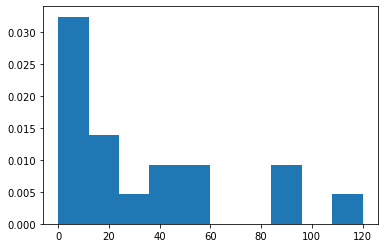

In [61]:
# data
days = np.array([0, 2, 14, 2, 37, 23, 2, 0, 7, 21, 120, 88, 28, 59, 85, 40, 59, 6])
n = days.size

# plot of days
plt.hist(days, density=True)

We assume that these are drawn from an exponential distribution
$ f(x;\theta) = \theta e^{-\theta x}$.

## 1. Uninformative Gamma Prior

We let the prior be an uninformative Gamma distribution
$\xi(\theta) = e^{-x}$. The posterior is then another Gamma distribution with $\alpha' = \alpha + n$ and $\beta' = \beta + \sum_{i=1}^n x_i$.

In [62]:
alpha = 1
beta = 1
alpha_prime = alpha + n
beta_prime = beta + days.sum()
mean_theta_1 = alpha_prime / beta_prime
alpha_prime, beta_prime

(19, 594)

/var/folders/kz/3r71r65n5wj2pd5__r_bk_3r0000gn/T/ipykernel_34493/345945953.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


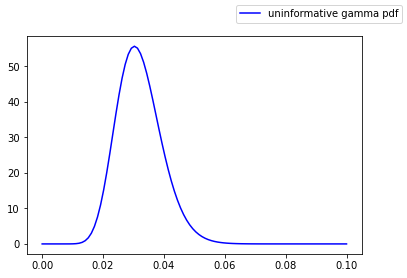

In [63]:
fig, ax = plt.subplots(1,1)
x = np.linspace(0, 0.1, 100)
ax.plot(x, gamma.pdf(x, alpha_prime, scale = 1 / beta_prime ), 'b-', label='uninformative gamma pdf')
fig.legend()
fig.show()



## 2. Gamma with prior

We let the prior be a Gamma distribution with $\alpha = 1$, $\beta = 7$.
The posterior is then another Gamma distribution with $\alpha' = \alpha + n$ and $\beta' = \beta + \sum_{i=1}^n x_i$.

In [64]:
alpha = 1
beta = 7
alpha_prime = alpha + n
beta_prime = beta + days.sum()
mean_theta_2 = alpha_prime / beta_prime
alpha_prime, beta_prime

(19, 600)

/var/folders/kz/3r71r65n5wj2pd5__r_bk_3r0000gn/T/ipykernel_34493/423986740.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


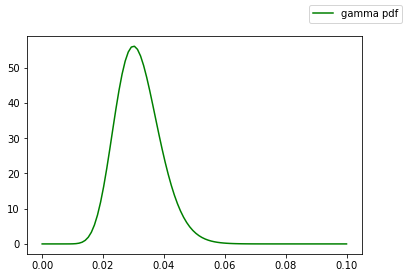

In [65]:
fig, ax = plt.subplots(1,1)
x = np.linspace(0, 0.1, 100)
ax.plot(x, gamma.pdf(x, alpha_prime, scale = 1 / beta_prime ), 'g-', label='gamma pdf')
fig.legend()
fig.show()

## 3. Finding Probability

We will pick the values for $\theta$ that minimise the square loss function. By Thm 4.7.3 this value is the mean of the gamma distribution that can be calculated as $\frac{\alpha}{\beta}$.

In [66]:
# Uninformative gamma prior
x = 15
prob_uninformative = 1 - expon.cdf(x, scale = 1 / mean_theta_1)
prob_informed = 1 - expon.cdf(x, scale = 1 / mean_theta_2)

prob_uninformative, prob_informed

(0.6189084111797547, 0.62188505646502)

Using the uninformative prior we get the $P(X > 15) \approx 0.6189$. Using the other prior distribution we get that $P(X > 15) \approx 0.6219$